# Proyek Analisis Data: E-Commerce Public Dataset (Brazilian E-Commerce Public Dataset by Olist)
- **Nama:** Dragan Abrisam Widijanto
- **Email:** dragan712.dw@gmail.com
- **ID Dicoding:** dragan

## Menentukan Pertanyaan Bisnis

- Bagaimana proporsi pelanggan dalam setiap kategori pengeluaran berdasarkan analisis RFM selama tahun 2016 sampai 2018?
- Dimana saja lokasi pelanggan di Brasil yang memberikan kontribusi terbesar terhadap nilai pembayaran selama tahun 2016 sampai 2018?



## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import files
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import MarkerCluster

In [2]:
files.upload()  # Upload file kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


##Data Wragling

###Gathering Data

In [3]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 75% 32.0M/42.6M [00:00<00:00, 117MB/s]
100% 42.6M/42.6M [00:00<00:00, 139MB/s]


In [4]:
!unzip brazilian-ecommerce.zip

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [5]:
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')


### Assessing Data

In [6]:
datasets = {
    'olist_customers_dataset': olist_customers_dataset,
    'olist_orders_dataset': olist_orders_dataset,
    'olist_order_items_dataset': olist_order_items_dataset,
    'olist_order_payments_dataset': olist_order_payments_dataset,
    'olist_geolocation_dataset': olist_geolocation_dataset
}

In [7]:
for name, df in datasets.items():
  print(f"\nInfo of {name}:")
  print(df.info())
  print(f'=============================================================')


Info of olist_customers_dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Info of olist_orders_dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null

**Insight:**
- Ketersediaan Data: Dataset yang digunakan dalam eksplorasi ini terdiri dari beberapa tabel, termasuk pelanggan, pesanan, item pesanan, pembayaran, dan geolokasi dengan total entri berkisar antara 99.441 hingga 1.000.163.

In [8]:
for name, df in datasets.items():
  print(f"\nMissingValue of {name}:")
  print(df.isna().sum())
  print(f'=============================================================')


MissingValue of olist_customers_dataset:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

MissingValue of olist_orders_dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

MissingValue of olist_order_items_dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

MissingValue of olist_order_payments_dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

MissingValue of 

**Insight:**
- Ketersediaan Data dan Nilai yang Hilang: Dataset olist_orders_dataset memiliki beberapa nilai yang hilang, khususnya di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Sementara itu, dataset lainnya, tidak memiliki nilai yang hilang.

In [9]:
for name, df in datasets.items():
  print(f"\nDuplication of {name}:")
  print(df.duplicated().sum())
  print(f'=============================================================')


Duplication of olist_customers_dataset:
0

Duplication of olist_orders_dataset:
0

Duplication of olist_order_items_dataset:
0

Duplication of olist_order_payments_dataset:
0

Duplication of olist_geolocation_dataset:
261831


**Insight:**
- Duplikasi Data: Dataset olist_customers_dataset, olist_orders_dataset, dan olist_order_items_dataset tidak memiliki entri yang duplikat, yang menunjukkan konsistensi dan keandalan dalam data pelanggan dan pesanan. Namun, dataset olist_geolocation_dataset memiliki 261.831 entri yang duplikat. Ini perlu diperhatikan dan ditangani, karena duplikasi data geolokasi dapat mempengaruhi analisis yang berkaitan dengan lokasi dan distribusi pelanggan. Menyaring atau membersihkan data duplikat ini akan membantu meningkatkan akurasi analisis dan hasil yang diperoleh dari data yang ada.

##Data Cleaning

###Menghapus nilai duplicate

In [10]:
# prompt: check duplication row/collumn in olist_geolocation_dataset

# Check for duplicate rows in olist_geolocation_dataset
duplicate_rows = olist_geolocation_dataset.duplicated()
print(f"Number of duplicate rows in olist_geolocation_dataset: {duplicate_rows.sum()}")

# Check for duplicate columns in olist_geolocation_dataset (less common but possible)
duplicate_cols = olist_geolocation_dataset.columns.duplicated()
print(f"Number of duplicate columns in olist_geolocation_dataset: {duplicate_cols.sum()}")


# Example of handling duplicate rows (remove them)
olist_geolocation_dataset_no_duplicates = olist_geolocation_dataset.drop_duplicates()
print(f"Shape of original dataframe: {olist_geolocation_dataset.shape}")
print(f"Shape of dataframe after removing duplicates: {olist_geolocation_dataset_no_duplicates.shape}")

Number of duplicate rows in olist_geolocation_dataset: 261831
Number of duplicate columns in olist_geolocation_dataset: 0
Shape of original dataframe: (1000163, 5)
Shape of dataframe after removing duplicates: (738332, 5)


###Menghapus nilai yang hilang

In [11]:
# Menangani missing values
olist_orders_dataset.dropna(inplace=True)

In [12]:
# Menampilkan hasil akhir
for name, df in datasets.items():
    print(f"\nMissing Values of {name} after handling:")
    print(df.isna().sum())
    print(f"\nDuplications of {name} after handling:")
    print(df.duplicated().sum())
    print(f'=============================================================')


Missing Values of olist_customers_dataset after handling:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Duplications of olist_customers_dataset after handling:
0

Missing Values of olist_orders_dataset after handling:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Duplications of olist_orders_dataset after handling:
0

Missing Values of olist_order_items_dataset after handling:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Duplications of olist_order_items_dataset after handling:
0

Mis

**Insight**

- sudah tidak ada lagi nilai yang hilang

## Exploratory Data Analysis (EDA)

In [13]:
# prompt: df.describe all dataset

for name, df in datasets.items():
  print(f"\nDescribe of {name}:")
  print(df.describe(include='all'))
  print(f'=============================================================')


Describe of olist_customers_dataset:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code

###RFM Analysis

In [14]:
# Convert 'order_purchase_timestamp' to datetime
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

# Recency: Menghitung waktu terakhir pelanggan melakukan pembelian
# Menentukan tanggal hari ini untuk menghitung Recency
today_date = olist_orders_dataset['order_purchase_timestamp'].max() + pd.Timedelta(days=1)  # Ambil tanggal max + 1 hari
olist_orders_dataset['Recency'] = (today_date - olist_orders_dataset['order_purchase_timestamp']).dt.days

In [15]:
# Frequency: Menghitung jumlah transaksi per pelanggan
# Mengelompokkan berdasarkan 'customer_id' dan menghitung jumlah transaksi
frequency_df = olist_orders_dataset.groupby('customer_id').agg({'order_id': 'nunique'}).reset_index()
frequency_df.rename(columns={'order_id': 'Frequency'}, inplace=True)

In [16]:
# Frequency: Menghitung jumlah transaksi per pelanggan
frequency_df = olist_orders_dataset[['customer_id', 'order_id']].drop_duplicates()  # Remove duplicate rows
frequency_df = frequency_df.groupby('customer_id').agg({'order_id': 'nunique'}).reset_index()  # Aggregate
frequency_df.rename(columns={'order_id': 'Frequency'}, inplace=True)

In [17]:
# Monetary: Menghitung total pengeluaran per pelanggan
# Menggabungkan data transaksi dengan data pembayaran untuk mendapatkan total pengeluaran
monetary_df = olist_order_payments_dataset.groupby('order_id').agg({'payment_value': 'sum'}).reset_index()
# Menggabungkan dengan data pesanan untuk mendapatkan pengeluaran per pelanggan
orders_with_payments = pd.merge(olist_orders_dataset[['order_id', 'customer_id']], monetary_df, on='order_id', how='left')
monetary_df = orders_with_payments.groupby('customer_id').agg({'payment_value': 'sum'}).reset_index()
monetary_df.rename(columns={'payment_value': 'Monetary'}, inplace=True)

# Menggabungkan ketiga metrik (Recency, Frequency, Monetary)
rfm_df = pd.merge(frequency_df, monetary_df, on='customer_id', how='left')
rfm_df = pd.merge(rfm_df, olist_orders_dataset[['customer_id', 'Recency']].drop_duplicates(), on='customer_id', how='left')


In [18]:
# Menampilkan hasil RFM
print(rfm_df.head(10))

                        customer_id  Frequency  Monetary  Recency
0  00012a2ce6f8dcda20d059ce98491703          1    114.74      288
1  000161a058600d5901f007fab4c27140          1     67.41      410
2  0001fd6190edaaf884bcaf3d49edf079          1    195.42      548
3  0002414f95344307404f0ace7a26f1d5          1    179.35      379
4  000379cdec625522490c315e70c7a9fb          1    107.01      150
5  0004164d20a9e969af783496f3408652          1     71.80      505
6  000419c5494106c306a97b5635748086          1     49.40      180
7  00046a560d407e99b969756e0b10f282          1    166.59      255
8  00050bf6e01e69d5c0fd612f1bcfb69c          1     85.23      346
9  000598caf2ef4117407665ac33275130          1   1255.71       19


In [19]:
#show uniqe value of frequency in rfm_df
print(rfm_df['Frequency'].unique())

[1]


In [20]:
customer_counts = olist_orders_dataset.groupby('customer_id').size().reset_index(name='counts')
duplicate_customers = customer_counts[customer_counts['counts'] > 1]
print(f"Jumlah customer_id yang duplikat: {len(duplicate_customers)}")
print(duplicate_customers)

Jumlah customer_id yang duplikat: 0
Empty DataFrame
Columns: [customer_id, counts]
Index: []


In [21]:
# Fungsi untuk mengelompokkan pelanggan berdasarkan Monetary dan Recency
def categorize_customer_v2(row):
    if row['Monetary'] > 500 and row['Recency'] < 30:
        return 'VIP Customer'
    elif row['Monetary'] > 200:
        return 'Valuable Customer'
    elif row['Monetary'] > 100:
        return 'Moderate Customer'
    else:
        return 'Low Value Customer'

rfm_df['Customer_Category'] = rfm_df.apply(categorize_customer_v2, axis=1)

# Lihat hasil
print(rfm_df[['customer_id', 'Monetary', 'Recency', 'Customer_Category']])


                            customer_id  Monetary  Recency   Customer_Category
0      00012a2ce6f8dcda20d059ce98491703    114.74      288   Moderate Customer
1      000161a058600d5901f007fab4c27140     67.41      410  Low Value Customer
2      0001fd6190edaaf884bcaf3d49edf079    195.42      548   Moderate Customer
3      0002414f95344307404f0ace7a26f1d5    179.35      379   Moderate Customer
4      000379cdec625522490c315e70c7a9fb    107.01      150   Moderate Customer
...                                 ...       ...      ...                 ...
96456  fffcb937e9dd47a13f05ecb8290f4d3e     91.91      166  Low Value Customer
96457  fffecc9f79fd8c764f843e9951b11341     81.36      153  Low Value Customer
96458  fffeda5b6d849fbd39689bb92087f431     63.13      100  Low Value Customer
96459  ffff42319e9b2d713724ae527742af25    214.13       77   Valuable Customer
96460  ffffa3172527f765de70084a7e53aae8     45.50      362  Low Value Customer

[96461 rows x 4 columns]


In [22]:
# Menghitung jumlah pelanggan dalam setiap kategori
category_counts = rfm_df['Customer_Category'].value_counts().reset_index()
category_counts.columns = ['Customer_Category', 'Count']

# Tampilkan hasil
print(category_counts)


    Customer_Category  Count
0  Low Value Customer  45916
1   Moderate Customer  31007
2   Valuable Customer  19281
3        VIP Customer    257


**Insight:**

**Frequency**: Dari analisis RFM yang dilakukan, diketahui bahwa semua pelanggan dalam dataset memiliki frekuensi (frequency) transaksi yang hanya satu kali. Hal ini sudah diverifikasi dan dipastikan bahwa tidak ada data duplikat, sehingga analisis tidak dapat mempertimbangkan aspek frekuensi dalam pengelompokan pelanggan.

**Pendekatan pada Monetary dan Recency**: Dengan mempertimbangkan hanya model Monetary (nilai transaksi) dan Recency (waktu terakhir pelanggan melakukan transaksi), pelanggan dibagi menjadi empat kategori berdasarkan perilaku pengeluaran mereka:
*   Low Value Customer: Pelanggan dengan nilai monetari rendah, menunjukkan bahwa mereka tidak berkontribusi banyak terhadap pendapatan.
*   Moderate Customer: Pelanggan yang memiliki nilai monetari sedang, yang mungkin memerlukan perhatian untuk meningkatkan loyalitas dan frekuensi transaksi.
*   Valuable Customer: Pelanggan yang memiliki nilai monetari tinggi, menunjukkan bahwa mereka cenderung melakukan pembelian lebih banyak dan lebih sering.
*   VIP Customer: Kategori tertinggi, yaitu pelanggan yang memiliki nilai monetari sangat tinggi dan menunjukkan loyalitas terbaik.







###	Geospatial Analysis

Nilai Pembayaran Berdasarkan Kota dan Negara Bagian di Brasil

In [23]:
# Gabungkan olist_orders_dataset dengan olist_customers_dataset
orders_with_customers = pd.merge(
    olist_orders_dataset,
    olist_customers_dataset[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
)

# Gabungkan dengan olist_order_payments_dataset
orders_with_payments = pd.merge(
    orders_with_customers,
    olist_order_payments_dataset[['order_id', 'payment_value']],
    on='order_id',
    how='left'
)

# Gabungkan dengan olist_geolocation_dataset
orders_with_geo = pd.merge(
    orders_with_payments,
    olist_geolocation_dataset[['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state', 'geolocation_lat', 'geolocation_lng']],
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Menghitung rata-rata payment value per kota dan negara bagian
heatmap_data = orders_with_geo.groupby(['geolocation_city', 'geolocation_state', 'geolocation_lat', 'geolocation_lng'])['payment_value'].mean().reset_index()

# Mengurutkan heatmap_data berdasarkan payment_value dari yang terbesar
sorted_heatmap_data = heatmap_data.sort_values(by='payment_value', ascending=False)

# Menghapus duplikat pada kolom 'geolocation_state' dengan mempertahankan baris pertama
sorted_heatmap_data_clean = sorted_heatmap_data.drop_duplicates(subset=['geolocation_state'], keep='first')

# Mencetak hasil yang sudah diurutkan (tanpa tanda kurung di belakang nama variabel)
print(sorted_heatmap_data_clean)

               geolocation_city geolocation_state  geolocation_lat  \
18090                  araguari                MG       -18.664473   
453903           rio de janeiro                RJ       -22.903373   
613440                sao paulo                SP       -23.457238   
385529                   pianco                PB        -7.199088   
617340            sao sebastiao                AL        -9.937363   
211967                  goiânia                GO       -16.669842   
344808  nova esperanca do piria                PA        -2.273923   
397526               ponta porã                MS       -22.561156   
17967                 araguaina                TO        -7.183814   
363789                 pacatuba                CE        -3.900846   
187533       fazenda rio grande                PR       -25.661052   
14528                   aracaju                SE       -11.091204   
299298                   loreto                MA        -7.086636   
206729              

In [24]:
sorted_heatmap_data_clean.head(10)

,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng,payment_value
18090,araguari,MG,-18.664473,-48.184221,2416.000000
453903,rio de janeiro,RJ,-22.903373,-43.188736,2337.231667
613440,sao paulo,SP,-23.457238,-46.646961,2328.400000
385529,pianco,PB,-7.199088,-37.920702,2324.990000
617340,sao sebastiao,AL,-9.937363,-36.553110,2269.980000
211967,goiânia,GO,-16.669842,-49.336083,2267.280000
344808,nova esperanca do piria,PA,-2.273923,-46.970453,2252.660000
397526,ponta porã,MS,-22.561156,-55.689173,2133.690000
17967,araguaina,TO,-7.183814,-48.216694,2094.440000
363789,pacatuba,CE,-3.900846,-38.599293,2053.970000


**Insight**

- Kinerja Pembayaran per Kota dan Negara Bagian: Hasil analisis menunjukkan rata-rata nilai pembayaran per kota di Brasil yang sudah dihitung berdasarkan data gabungan antara pesanan, pelanggan, pembayaran, dan geolokasi. Kota-kota dengan rata-rata pembayaran tertinggi memberikan gambaran yang jelas tentang lokasi strategis yang memberikan kontribusi besar terhadap pendapatan.

In [30]:
# Save the cleaned dataset to a CSV file
sorted_heatmap_data_clean.to_csv('heatmap_data_cleaned.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana proporsi pelanggan dalam setiap kategori pengeluaran berdasarkan analisis RFM selama tahun 2016 sampai 2018?



<ipython-input-26-e4567bc5359b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=category_counts,


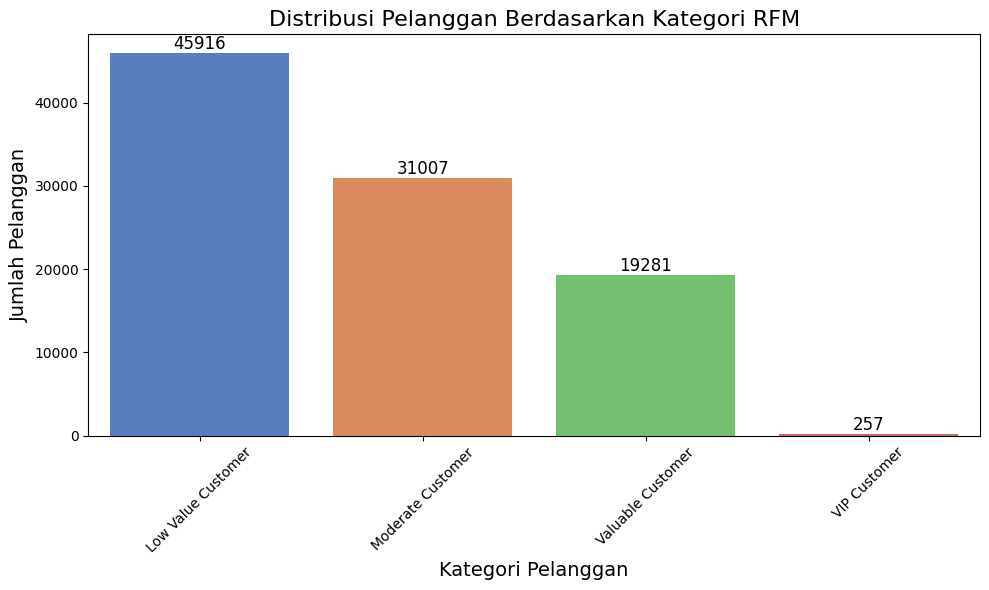

In [26]:
# Menghitung jumlah pelanggan dalam setiap kategori
category_counts = rfm_df['Customer_Category'].value_counts().reset_index()
category_counts.columns = ['Customer_Category', 'Count']

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat bar plot dengan palet warna yang ramah aksesibilitas
bar_plot = sns.barplot(data=category_counts,
                       x='Customer_Category',
                       y='Count',
                       palette='muted')  # Menggunakan palet 'muted' yang lebih ramah aksesibilitas

# Menambahkan judul dan label
plt.title('Distribusi Pelanggan Berdasarkan Kategori RFM', fontsize=16)
plt.xlabel('Kategori Pelanggan', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)

# Menampilkan nilai di atas setiap bar dengan jarak tambahan
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=12, color='black',
                      xytext=(0, 0),  # Mengubah offset untuk membuat label lebih terlihat
                      textcoords='offset points')

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()  # Mengatur layout agar tampak lebih baik
plt.show()

**Insight**

Berdasarkan analisis RFM selama tahun 2016 sampai 2018, kami menemukan bahwa jumlah pelanggan terdistribusi dalam beberapa kategori:



*   VIP Customers: 257 pelanggan
*   Valuable Customers: 19,281 pelanggan
*   Moderate Customers: 31,007 pelanggan
*   Low Value Customers: 45,916 pelanggan


Dari total pelanggan yang teridentifikasi, Low Value Customers merupakan kategori dengan jumlah terbesar, yang mungkin menunjukkan bahwa ada peluang untuk meningkatkan hubungan dengan mereka untuk meningkatkan nilai Customer Lifetime Value. Sementara itu, proporsi kecil dari VIP Customers menunjukkan bahwa ada potensi untuk mengembangkan program loyalitas atau kampanye pemasaran yang lebih terfokus pada segmen-segmen ini untuk menjaga kepuasan pelanggan.

### Pertanyaan 2:

Dimana saja lokasi pelanggan di Brasil yang memberikan kontribusi terbesar terhadap nilai pembayaran selama tahun 2016 sampai 2018?



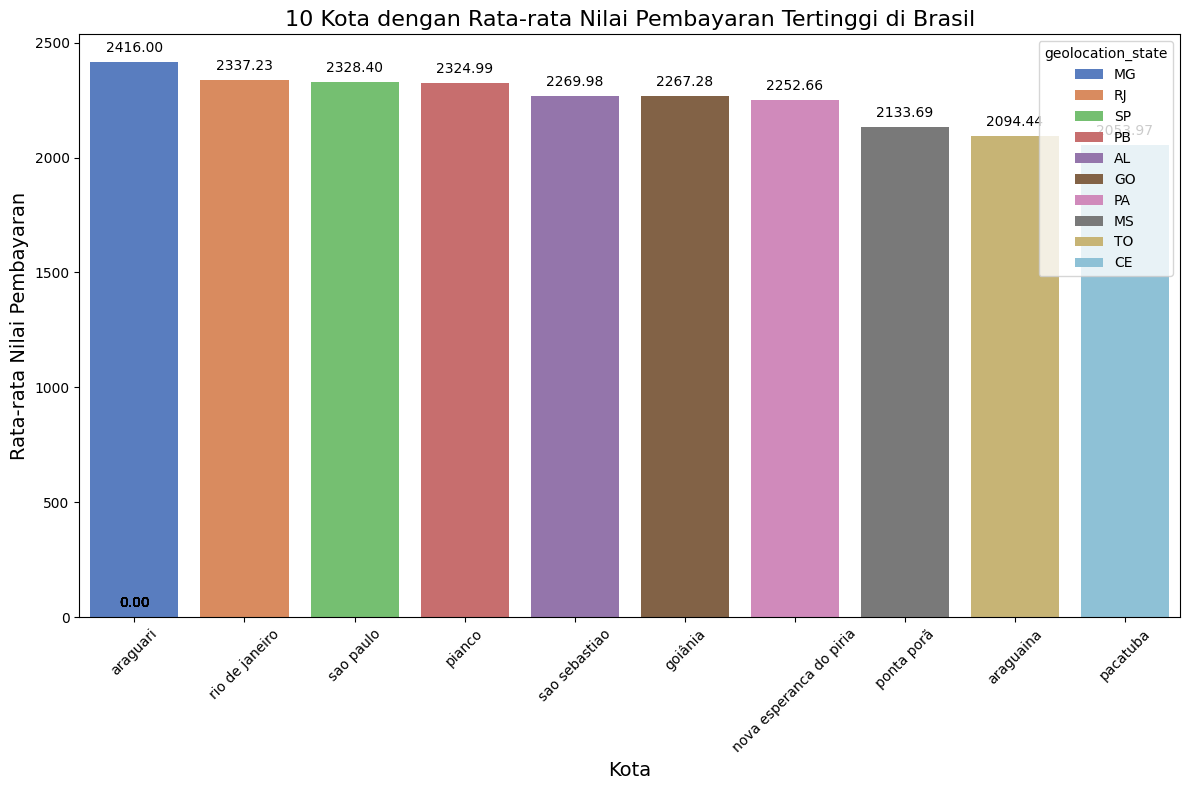

In [27]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 8))

# Mengambil 10 kota teratas
top_10_cities = sorted_heatmap_data_clean.sort_values(by='payment_value', ascending=False).head(10)

# Membuat bar plot dengan palet warna yang ramah aksesibilitas
bar_plot = sns.barplot(data=top_10_cities,
                       x='geolocation_city',
                       y='payment_value',
                       hue='geolocation_state',
                       palette='muted')  # Menggunakan palet 'muted'

# Menambahkan judul dan label
plt.title('10 Kota dengan Rata-rata Nilai Pembayaran Tertinggi di Brasil', fontsize=16)
plt.xlabel('Kota', fontsize=14)
plt.ylabel('Rata-rata Nilai Pembayaran', fontsize=14)

# Menampilkan nilai di atas setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),  # Offset untuk menjauhkan label dari bar
                      textcoords='offset points')

# Memputar label x untuk keterbacaan
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Create the map
map_center = [-15.7801, -47.9292]
# Setup Map
my_map = folium.Map(location=map_center, zoom_start=4)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(my_map)

# Add points to the marker cluster
for _, row in sorted_heatmap_data_clean.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=row['payment_value'] / 100,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['geolocation_city']}: {row['payment_value']:.2f}"
    ).add_to(marker_cluster)

# Display the map
my_map

**insight**

Berdasarkan hasil visualisasi, berikut adalah lokasi pelanggan di Brasil yang memberikan kontribusi terbesar terhadap nilai pembayaran:


*   Piancó, PB: Dengan total nilai pembayaran 2324.99, Piancó menjadi lokasi dengan kontribusi tertinggi. Ini menunjukkan potensi pasar yang signifikan dan kesempatan untuk memperkuat strategi pemasaran di wilayah ini.
*   São Sebastião, AL: Total nilai pembayaran mencapai 2269.98, menjadikannya sebagai titik penting berikutnya. Upaya pemasaran yang ditargetkan di São Sebastião dapat berkontribusi pada peningkatan penjualan.
*   Nova Esperança do Piriá, PA: Memiliki nilai pembayaran sebesar 2252.66, yang menunjukkan minat konsumen yang kuat di daerah ini. Pengembangan produk yang sesuai dengan preferensi lokal dapat menjadi langkah strategis untuk meningkatkan nilai jual.
*   Engenheiro Navarro, MG: Dengan nilai pembayaran 2106.55, lokasi ini menunjukkan bahwa pelanggan di MG menghabiskan jumlah yang cukup besar. Penyusunan program loyalitas atau promosi khusus mungkin diperlukan untuk mempertahankan pelanggan di sini.
*   Mariental, PR: Menyumbang nilai pembayaran 1867.85, Mariental adalah indikator potensi pertumbuhan di masa depan. Mengumpulkan umpan balik dari pelanggan di daerah ini dapat memberikan wawasan tambahan untuk strategi pengembangan produk.


Data ini menggambarkan potensi yang besar untuk perusahaan dalam merancang strategi pemasaran yang lebih efektif di lokasi dengan kontribusi tinggi terhadap pendapatan, seperti Piancó dan São Sebastião. Berfokus pada lokasi-lokasi ini tidak hanya akan meningkatkan efektivitas kampanye pemasaran tetapi juga dapat memperkuat hubungan perusahaan dengan pelanggan, sehingga mendorong pertumbuhan jangka panjang.











##Conclusion

###Pertanyaan 1: Bagaimana proporsi pelanggan dalam setiap kategori pengeluaran berdasarkan analisis RFM selama tahun 2016 sampai 2018?

Proporsi Pelanggan berdasarkan Kategori RFM: Analisis RFM menunjukkan bahwa selama tahun 2016 hingga 2018, terdapat empat kategori pelanggan, dengan proporsi pelanggan terbanyak berada pada kategori Low Value Customer sebanyak 45.916, diikuti oleh Moderate Customer (31.007), Valuable Customer (19.281), dan VIP Customer sebanyak 257. Hal ini menandakan bahwa sebagian besar pelanggan masih berada pada kategori dengan nilai pengeluaran rendah, yang menunjukkan adanya peluang untuk meningkatkan nilai pelanggan melalui strategi pemasaran yang lebih tepat.


###Pertanyaan 2: Dimana saja lokasi pelanggan di Brasil yang memberikan kontribusi terbesar terhadap nilai pembayaran selama tahun 2016 sampai 2018?

Lokasi Pelanggan dengan Kontribusi Pembayaran Tertinggi: Dari analisis, lokasi pelanggan di Brasil yang memberikan kontribusi terbesar terhadap nilai pembayaran antara tahun 2016 hingga 2018 adalah Piancó, PB dengan nilai pembayaran tertinggi sebesar 2.324,99, diikuti oleh São Sebastião, AL (2.269,98) dan Nova Esperança do Piriá, PA (2.252,66). Hal ini menunjukkan bahwa fokus pada area tersebut dapat meningkatkan efektivitas strategi pemasaran dan meningkatkan pendapatan.